<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2023/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import scipy.stats as stats

In [5]:
h = nib.load('s01.nii.gz')
print(h.header['pixdim'])

[-1.  1.  1.  2.  1.  1.  1.  1.]


In [6]:
# calculate voxel volume
dv = np.prod(h.header['pixdim'][1:4])
dv

2.0

## 1. Segmentation

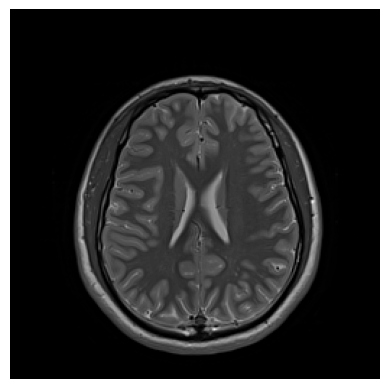

In [7]:
mri = np.rot90(h.get_fdata()[:,:,24])
plt.imshow(mri,cmap='gray')
plt.axis('off')
plt.show()

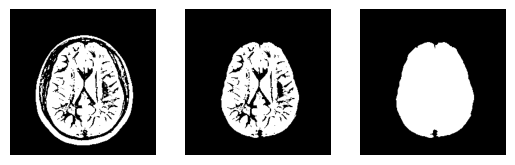

mask volume: 35532.0 mm^3


In [8]:
th = 600
seg = nd.gaussian_filter(mri,0.5)>th
l,m = nd.label(seg)
l_mode = stats.mode(l[l>0])
L = l==l_mode.mode
bmask = nd.binary_fill_holes(L)
plt.subplot(131)
plt.imshow(seg,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(L, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(bmask,cmap='gray')
plt.axis('off')
plt.show()

bmask_vol = np.sum(bmask[bmask>0]) * dv
print(f'mask volume: {bmask_vol} mm^3')

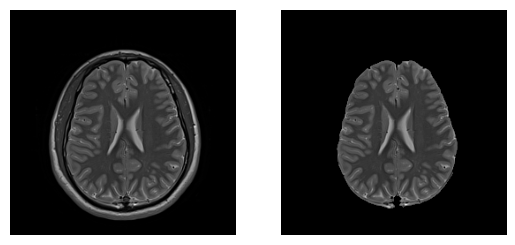

In [9]:
mri_masked = mri.copy()
mri_masked[bmask==0]=0
plt.subplot(121)
plt.imshow(mri,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(mri_masked,cmap='gray')
plt.axis('off')
plt.show()

after iteration #1 : [   0  615  961 1646]
E: 608
after iteration #2 : [   0  626  954 1525]
E: 139
after iteration #3 : [   0  627  948 1480]
E: 52


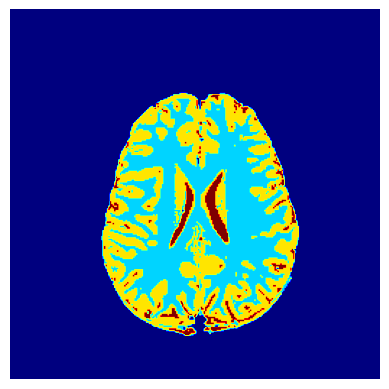

In [10]:
img = mri_masked.copy()
E = 1e6
eps = 100
m_vals = np.array([100, 500, 1000, 2000])
m_vals_new = m_vals.copy()
D = np.zeros((len(m_vals),img.shape[0],img.shape[1]))
n = 0
while E>eps:
  n = n+1
  for k in range(len(m_vals)):
    D[k] = np.abs(img-m_vals[k])
  R = np.argmin(D,axis=0)
  for k in range(len(m_vals)):
    m_vals_new[k] = np.mean(img[R==k])
  print(f'after iteration #{n} : {m_vals_new}')
  E = np.sum(np.abs(m_vals_new - m_vals))
  print('E:',E)
  m_vals = m_vals_new.copy()

plt.imshow(R,cmap='jet')
plt.axis('off')
plt.show()

## 2. Feature Extraction

In [12]:
wm_vol = np.sum([R==1])*dv
gm_vol = np.sum([R==2])*dv
csf_vol = np.sum([R==3])*dv
print(f'## volume features ##')
print(f'WM: {wm_vol} mm^3, GM: {gm_vol}mm^3, CSF: {csf_vol}mm^3')
wm_mean = np.mean(mri[R==1])
gm_mean = np.mean(mri[R==2])
csf_mean = np.mean(mri[R==3])
print(f'## intensity features ##')
print(f'WM mean: {wm_mean}, GM mean: {gm_mean}, CSF mean: {csf_mean}')


## volume features ##
WM: 18068.0 mm^3, GM: 15330.0mm^3, CSF: 2098.0mm^3
## intensity features ##
WM mean: 627.4956829754261, GM mean: 948.0431833007176, CSF mean: 1480.0581506196377


## Excersice
- s02.nii.gz에 대해서도 비슷한 위치에 슬라이스에 대해 같은 feature를 추출하여 s01.nii.gz의 결과와 비교하자.
- feature를 12개 이상 추가하여 같은 작업을 반복하자.